In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import desc

In [5]:
# Create Database Connection
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
# Display the row's columns and data in dictionary format
first_row = session.query(Base.classes.station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x214d7952b00>,
 'elevation': 3.0,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1}

In [11]:
# Use the session to query Station table and display the first 15 records
results = session.query(Station)

for row in session.query(Station.elevation, Station.latitude, Station.station, Station.longitude, Station.name, Station.id).\
    limit(15).all():
    print(row)

(3.0, 21.2716, 'USC00519397', -157.8168, 'WAIKIKI 717.2, HI US', 1)
(14.6, 21.4234, 'USC00513117', -157.8015, 'KANEOHE 838.1, HI US', 2)
(7.0, 21.5213, 'USC00514830', -157.8374, 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 3)
(11.9, 21.3934, 'USC00517948', -157.9751, 'PEARL CITY, HI US', 4)
(306.6, 21.4992, 'USC00518838', -158.0111, 'UPPER WAHIAWA 874.3, HI US', 5)
(19.5, 21.33556, 'USC00519523', -157.71139, 'WAIMANALO EXPERIMENTAL FARM, HI US', 6)
(32.9, 21.45167, 'USC00519281', -157.84888999999998, 'WAIHEE 837.5, HI US', 7)
(0.9, 21.3152, 'USC00511918', -157.9992, 'HONOLULU OBSERVATORY 702.2, HI US', 8)
(152.4, 21.3331, 'USC00516128', -157.8025, 'MANOA LYON ARBO 785.2, HI US', 9)


In [12]:
# Display the row's columns and data in dictionary format
first_row = session.query(Base.classes.measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x214d796ed68>,
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397'}

In [13]:
# Use the session to query Measurement table and display the first 15 records
results = session.query(Measurement)

for row in session.query(Measurement.tobs, Measurement.prcp,  Measurement.station, Measurement.id, Measurement.date).limit(15).all():
    print(row)

(65.0, 0.08, 'USC00519397', 1, '2010-01-01')
(63.0, 0.0, 'USC00519397', 2, '2010-01-02')
(74.0, 0.0, 'USC00519397', 3, '2010-01-03')
(76.0, 0.0, 'USC00519397', 4, '2010-01-04')
(73.0, None, 'USC00519397', 5, '2010-01-06')
(70.0, 0.06, 'USC00519397', 6, '2010-01-07')
(64.0, 0.0, 'USC00519397', 7, '2010-01-08')
(68.0, 0.0, 'USC00519397', 8, '2010-01-09')
(73.0, 0.0, 'USC00519397', 9, '2010-01-10')
(64.0, 0.01, 'USC00519397', 10, '2010-01-11')
(61.0, 0.0, 'USC00519397', 11, '2010-01-12')
(66.0, 0.0, 'USC00519397', 12, '2010-01-14')
(65.0, 0.0, 'USC00519397', 13, '2010-01-15')
(68.0, 0.0, 'USC00519397', 14, '2010-01-16')
(64.0, 0.0, 'USC00519397', 15, '2010-01-17')


In [14]:
#Choose a start date and end date for your trip. Make sure that your vacation range is approximately 3-15 days total.

sdate = input("Start Vacation date string in the format %Y-%m-%d? ")
edate = input("Start Vacation date string in the format %Y-%m-%d? ")

Start Vacation date string in the format %Y-%m-%d? 2018-01-15
Start Vacation date string in the format %Y-%m-%d? 2018-01-25


# Exploratory Climate Analysis

In [1]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [15]:
# Last Date in the database
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(last_date)

('2017-08-23',)


In [18]:
def getDate(last_date):
    y = int(last_date.split("-")[0])
    m = int(last_date.split("-")[1])
    d = int(last_date.split("-")[2])
    return [y,m,d]


In [21]:
# Calculate the date 1 year ago from the last data point in the database  

ymd = getDate(last_date[0])
query_date = dt.datetime(*ymd)-dt.timedelta(days=365)
print(query_date)

2016-08-23 00:00:00


In [24]:
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > query_date).\
          order_by(Measurement.date).all()


In [25]:
# Load the results into a pandas dataframe. Set the index to the Date

df = pd.DataFrame(results, columns=['Date', 'Prescipatation'])
df.sort_values(by='Date')
df.set_index(df['Date'], inplace=True, )
df.head(10)

,Date,Prescipatation
Date,,
2016-08-24,2016-08-24,0.08
2016-08-24,2016-08-24,2.15
2016-08-24,2016-08-24,2.28
2016-08-24,2016-08-24,NaN
2016-08-24,2016-08-24,1.22
2016-08-24,2016-08-24,2.15
2016-08-24,2016-08-24,1.45
2016-08-25,2016-08-25,0.08
2016-08-25,2016-08-25,0.08


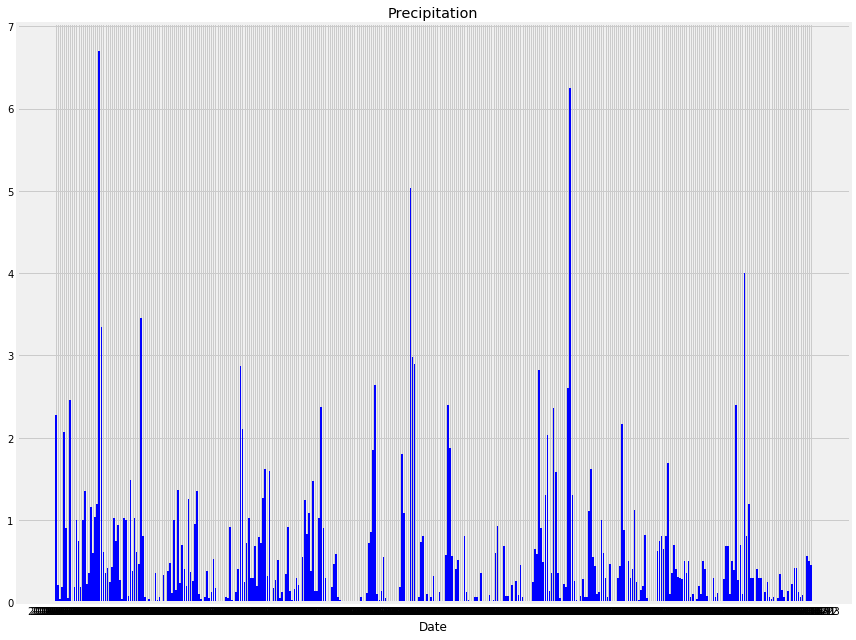

In [31]:
# Plot the Results in a Matplotlib bar chart    

# Set figure width to 12 and height to 9
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

x_axis = df['Date']
y_axis = df['Prescipatation']

plt.bar(x_axis, y_axis, color="b", width=0.8, align="center")

plt.title("Precipitation")
plt.xlabel("Date")

plt.tight_layout()
plt.show()

![precipitation](Images/precipitation.png)

In [35]:
# Use Pandas to calcualte the summary statistics for the precipitation data

df.describe()

,Prescipatation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data

![describe](Images/describe.png)

In [36]:
# Design a query to show how many stations are available in this dataset?
  
Station_count = session.query(Measurement).group_by(Measurement.station).count()
print(Station_count, end='\n')

9


In [37]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

st = session.query(Measurement.station, func.count(Measurement.station)).\
        group_by(Measurement.station).\
        order_by(desc(func.count(Measurement.station))).all()

for item in st:
    print(item) 

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [38]:
st = session.query(Measurement.station).\
        group_by(Measurement.station).\
        order_by(desc(func.count(Measurement.station))).first()

print(st)

('USC00519281',)


In [39]:
Min_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
Max_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
Avg_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()

print(Min_temp)
print(Max_temp)
print(Avg_temp)

[(54.0,)]
[(85.0,)]
[(71.66378066378067,)]


In [14]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?


[(54.0, 85.0, 71.66378066378067)]

In [44]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
results = session.query(Measurement.tobs).filter(Measurement.date > query_date).\
          filter(Measurement.station == 'USC00519281').\
          order_by(desc(Measurement.tobs)).all()

df = pd.DataFrame(results, columns=['Temperature'])

x_bins = np.linspace(55, 85, 12)
                   
print(x_bins)
df.head(5)

[55.         57.72727273 60.45454545 63.18181818 65.90909091 68.63636364
 71.36363636 74.09090909 76.81818182 79.54545455 82.27272727 85.        ]


,Temperature
0,83.0
1,82.0
2,82.0
3,82.0
4,81.0


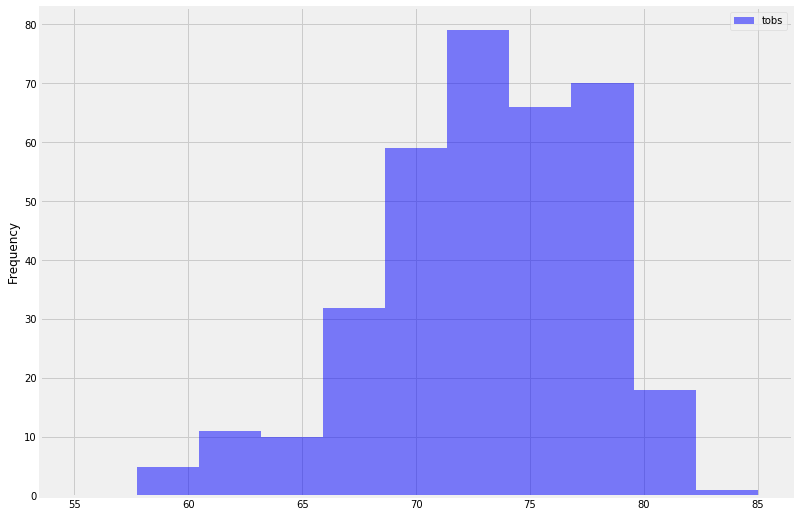

In [45]:
plt.hist(df['Temperature'],  bins=x_bins, alpha=0.5, color='blue',label='tobs' )

#plt.ylim([0, 10])

# Set the title and labels
plt.ylabel('Frequency')
plt.legend(loc='upper right')

plt.show()

In [51]:
#Use the `calc_temps` function to calculate the min, avg, and max temperatures for your trip using the 
#matching dates from the previous year (i.e., use "2017-01-01" if your trip start date was "2018-01-01").

print(sdate)
print(edate)

# Calculate the date 1 year ago from the vacation start and end date   

vstart_dt = getDate(sdate)
query_sdate = dt.datetime(*vstart_dt)-dt.timedelta(days=365)
print(query_sdate)

vend_dt = getDate(edate)
query_edate = dt.datetime(*vend_dt)-dt.timedelta(days=365)
print(query_edate)

# Calcualte temps
temp_out = calc_temps(query_sdate, query_edate) 
print(temp_out)

2018-01-15
2018-01-25
2017-01-15 00:00:00
2017-01-25 00:00:00
Start_date 2017-01-15 00:00:00
End date 2017-01-25 00:00:00
[(66.0, 71.75, 80.0)]


In [50]:
# Define the Calc Temp udf
def calc_temps(start_date, end_date):
        print ("Start_date", start_date)
        print ( "End date", end_date)
        
        return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()  
    

In [16]:
# Provided in template
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [17]:
# Provided in template
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


62.0 68.36585365853658 74.0


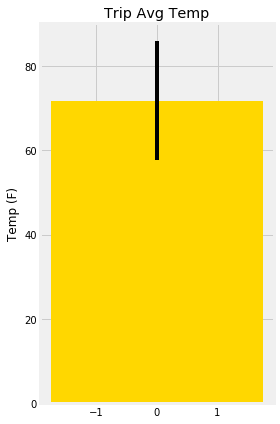

In [69]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

fig_size[0] = 4
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size

y_axis = 71.75
tmax = 80.0
tmin = 66.0

N = 1
ind = np.arange(N)    # the x locations for the groups
plt.bar(ind, y_axis, color="gold", width=3.5, align="center", yerr=tmax-tmin)

plt.title("Trip Avg Temp")
plt.ylabel("Temp (F)")

plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


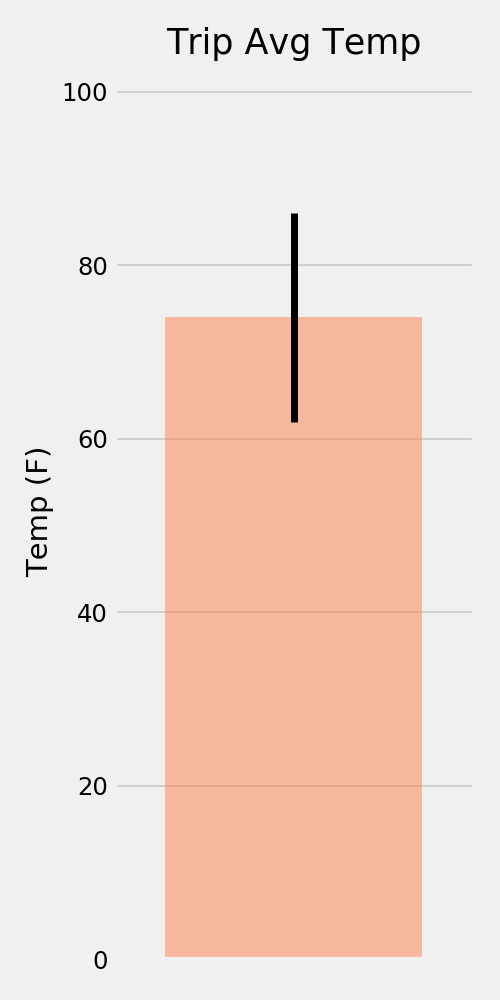

In [18]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
